In [47]:
import pandas as pd
import seaborn as sb
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.metrics import classification_report

In [48]:
df = pd.read_csv('/content/Attrition.csv')
df.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,Yes,41.0,Travel_Rarely,1102.0,Sales,1,2,Life Sciences,2,...,3,1,0,8,0,1,6,4,0,5
1,2,No,49.0,Travel_Frequently,279.0,Research & Development,8,1,Life Sciences,3,...,4,4,1,10,3,3,10,7,1,7
2,3,Yes,37.0,Travel_Rarely,1373.0,Research & Development,2,2,Other,4,...,3,2,0,7,3,3,0,0,0,0
3,4,No,33.0,Travel_Frequently,1392.0,Research & Development,3,4,Life Sciences,4,...,3,3,0,8,3,3,8,7,3,0
4,5,No,NaN,Travel_Rarely,591.0,Research & Development,2,1,Medical,1,...,3,4,1,6,3,3,2,2,2,2


In [49]:
# Checking for Null Values
df.isnull().sum()

EmployeeNumber              0
Attrition                   0
Age                         1
BusinessTravel              1
DailyRate                   1
Department                  8
DistanceFromHome            0
Education                   0
EducationField              7
EnvironmentSatisfaction     0
Gender                      4
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     5
JobSatisfaction             0
MaritalStatus               6
MonthlyIncome               5
MonthlyRate                 4
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [50]:
# Encoding features
df.drop(['EducationField'],inplace = True,axis = 1)
df['Attrition'] = df['Attrition'].map({'Yes':1,'No':0})
df['BusinessTravel'] = df['BusinessTravel'].map({'Travel_Frequently':1,'Travel_Rarely':2,'Non-Travel':3})
df['Department'] = df['Department'].map({'Sales':1,'Research & Development':2,'Human Resources':3})
df['MaritalStatus'] = df['MaritalStatus'].map({'Single':1,'Married':2,'Divorced':3})
df['Gender']= df['Gender'].map({'Female':0,'Male':1})
df.dropna(inplace=True)

In [51]:
label = preprocessing.LabelEncoder()
lst = ['JobRole','OverTime']
for i in lst:
  df[i]=label.fit_transform(df[i])

In [52]:
df.head()

,EmployeeNumber,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,1,41.0,2.0,1102.0,1.0,1,2,2,0.0,...,3,1,0,8,0,1,6,4,0,5
1,2,0,49.0,1.0,279.0,2.0,8,1,3,1.0,...,4,4,1,10,3,3,10,7,1,7
2,3,1,37.0,2.0,1373.0,2.0,2,2,4,1.0,...,3,2,0,7,3,3,0,0,0,0
3,4,0,33.0,1.0,1392.0,2.0,3,4,4,0.0,...,3,3,0,8,3,3,8,7,3,0
5,6,0,32.0,1.0,1005.0,2.0,2,2,4,1.0,...,3,3,0,8,2,2,7,7,3,6


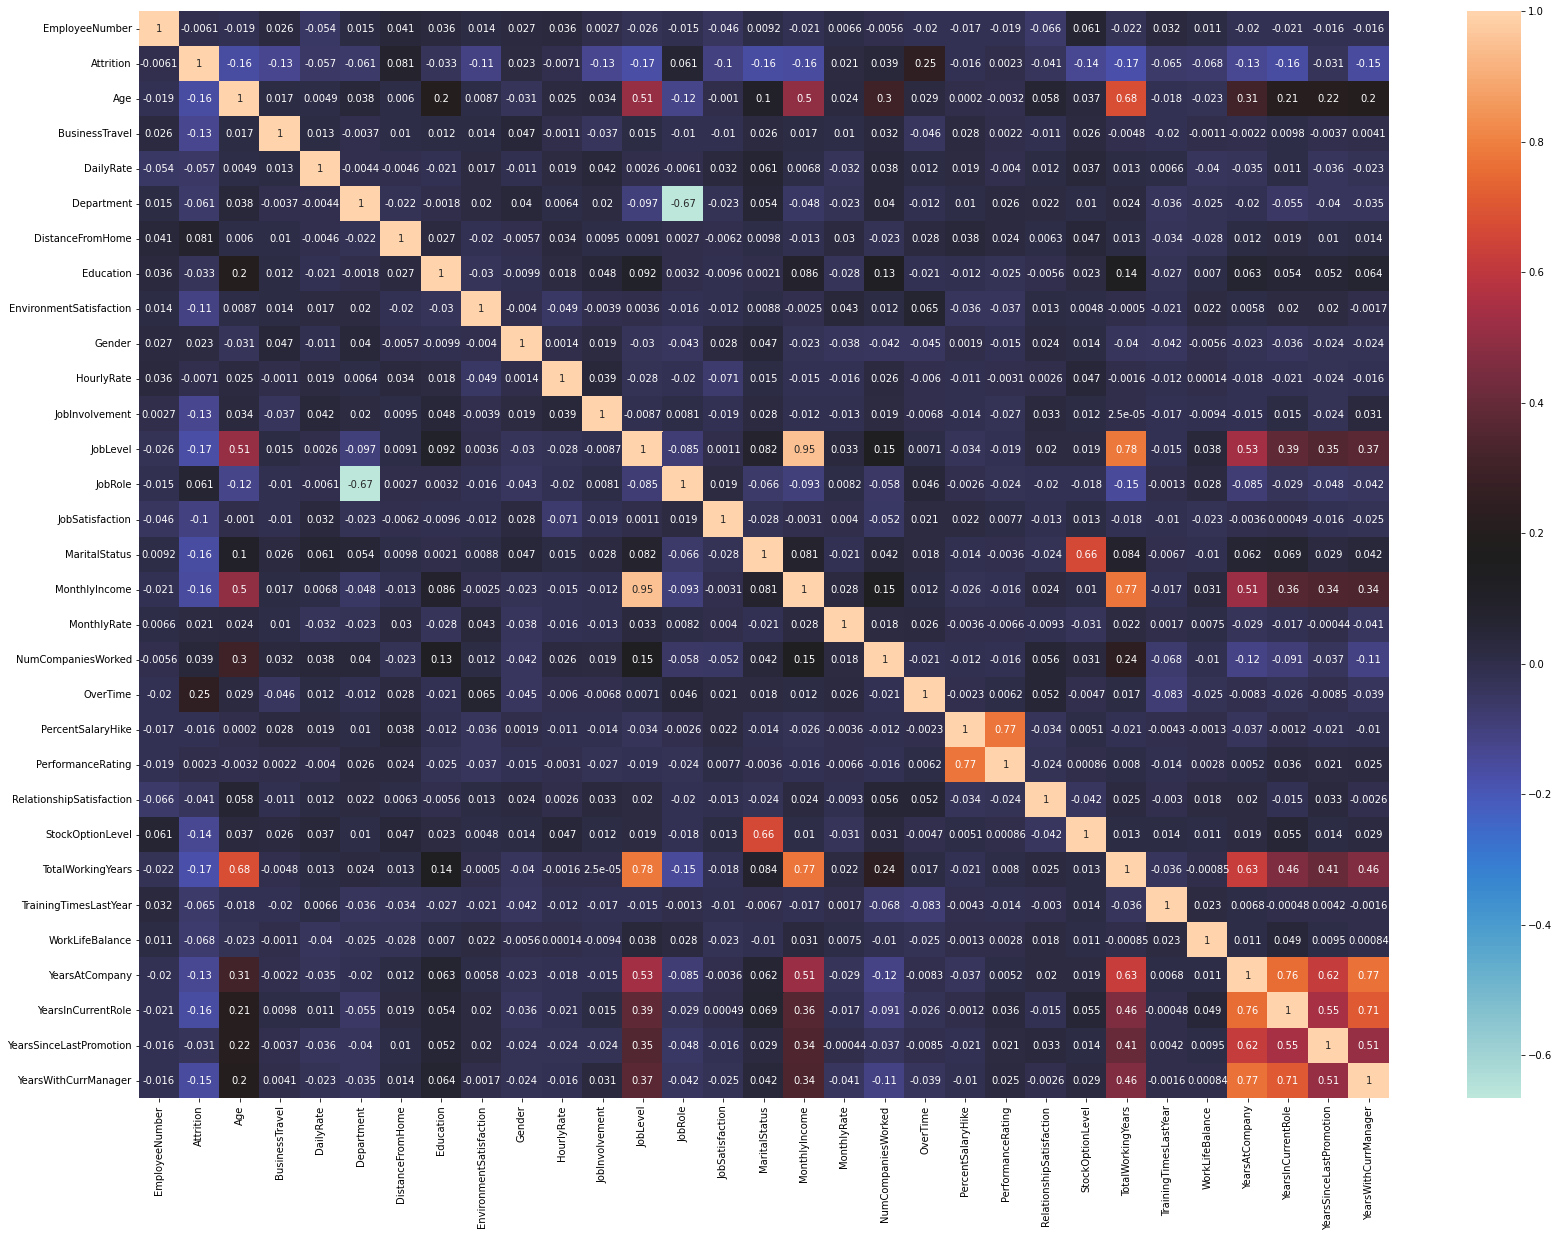

In [53]:
# Co-relation of features
plt.figure(figsize=(28,20))
c = df.corr()
sb.heatmap(c,cmap = 'icefire',annot = True)
plt.show()

In [54]:
# Information Gain Of Features
x = df.iloc[:,2:30]
y = df['Attrition']

mutual_info = mutual_info_classif(x,y)
mutual_info = pd.Series(mutual_info)
mutual_info.index = x.columns
mutual_info.sort_values(ascending = False)

BusinessTravel              0.031908
MonthlyIncome               0.031855
JobLevel                    0.031602
JobRole                     0.023736
Age                         0.022492
WorkLifeBalance             0.022115
YearsAtCompany              0.022081
TrainingTimesLastYear       0.021432
OverTime                    0.019796
Department                  0.015402
MaritalStatus               0.015395
JobSatisfaction             0.014960
TotalWorkingYears           0.013470
YearsInCurrentRole          0.012571
YearsSinceLastPromotion     0.012505
DailyRate                   0.008820
StockOptionLevel            0.006239
MonthlyRate                 0.004054
HourlyRate                  0.002522
NumCompaniesWorked          0.002119
PerformanceRating           0.001274
RelationshipSatisfaction    0.000000
PercentSalaryHike           0.000000
EnvironmentSatisfaction     0.000000
DistanceFromHome            0.000000
JobInvolvement              0.000000
Gender                      0.000000
E

In [55]:
data_1 = pd.crosstab(df["MaritalStatus"],  df['Attrition'])
data_1['percentage'] = data_1.apply(lambda x: x[1]*100/(x[0]+x[1]),axis=1)
print(data_1)

Attrition        0    1  percentage
MaritalStatus                      
1.0            344  117   25.379610
2.0            585   82   12.293853
3.0            287   33   10.312500


In [56]:
data_2 = pd.crosstab(df["JobRole"],  df['Attrition'])
data_2['percentage'] = data_2.apply(lambda x: x[1]*100/(x[0]+x[1]),axis=1)
print(data_2)

Attrition    0   1  percentage
JobRole                       
0          121   9    6.923077
1           40  12   23.076923
2          191  61   24.206349
3           95   5    5.000000
4          132  10    7.042254
5           77   2    2.531646
6          241  45   15.734266
7          269  57   17.484663
8           50  31   38.271605


In [57]:
data_3 = pd.crosstab(df["OverTime"],  df['Attrition'])
data_3['percentage'] = data_3.apply(lambda x: x[1]*100/(x[0]+x[1]),axis=1)
print(data_3)

Attrition    0    1  percentage
OverTime                       
0          933  107   10.288462
1          283  125   30.637255


In [58]:
data_4 = pd.crosstab(df["Gender"],  df['Attrition'])
data_4['percentage'] = data_4.apply(lambda x: x[1]*100/(x[0]+x[1]),axis=1)
print(data_4)

Attrition    0    1  percentage
Gender                         
0.0        494   87   14.974182
1.0        722  145   16.724337


In [59]:
# Droping of Features based on Co-releation and Information Gain
df.drop(['DistanceFromHome','Education','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','TrainingTimesLastYear','Gender','TotalWorkingYears','Department','YearsAtCompany'],inplace = True,axis =1)

MODEL BUILDING

In [60]:
train_x,test_x,train_y,tset_y = train_test_split(x,y,test_size = 0.2,random_state = 3)

In [61]:
# Hyper Tuning the parameters
model = GradientBoostingClassifier()
param = {'n_estimators':[75,100,125],'learning_rate':[0.1,0.5,0.01]}
gscv = GridSearchCV(model,param,verbose = 3,n_jobs = -1)
gscv.fit(train_x,train_y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 0.01],
                         'n_estimators': [75, 100, 125]},
             verbose=3)

In [62]:
gscv.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [63]:
# Final model training
model = GradientBoostingClassifier(n_estimators=100,learning_rate=0.1)
model.fit(train_x,train_y)
y_pred = model.predict(test_x)
print(classification_report(tset_y,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       249
           1       0.74      0.41      0.53        41

    accuracy                           0.90       290
   macro avg       0.82      0.70      0.74       290
weighted avg       0.89      0.90      0.88       290

